https://www.youtube.com/watch?v=m2AyljDHYes

https://www.kaggle.com/yugpuroosh/autoencoder-made-easy/edit

In [1]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf  

from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2152716341642169346
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6274678784
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13015237231407606659
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Part 1
## *Get MNIST handwritten digit data*

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


## Prepocessing the data

In [4]:
def pre_process(X):
    X = X/255.0
    X = X.reshape(len(X), 784)
    return X

X_train = pre_process(X_train)
X_test = pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


## Visualize the digits 

In [5]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range (n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(X[i].reshape((height, width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

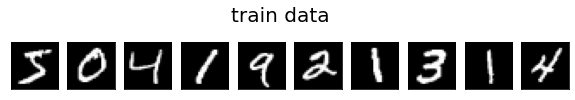

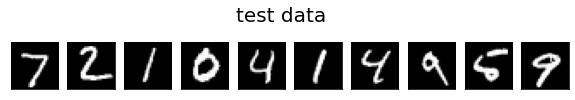

In [6]:
show_data(X_train, title="train data")
show_data(X_test, title="test data")

## build the digit Autoencoder

In [7]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [8]:
# encoder
input_layer = Input(shape=(input_dim,), name= "INPUT")
hidden_layer_1 = Dense(hidden_dim, activation = 'relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder 
hidden_layer_2 = Dense(hidden_dim, activation = 'relu', name="HIDDEN_2")(code_layer)
outpput_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [9]:
AE = Model(input_layer, outpput_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
CODE (Dense)                 (None, 100)               25700     
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


## Train the digit Autoencoder

In [10]:
AE.fit(X_train, X_train, epochs = 10, batch_size = 32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 1ms/step - loss: 0.1682 - val_loss: 0.0874
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0845 - val_loss: 0.0807
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0782 - val_loss: 0.0774
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0755 - val_loss: 0.0751
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0739 - val_loss: 0.0736
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0727 - val_loss: 0.0740
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0718 - val_loss: 0.0725
Epoch 8/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0715 - val_loss: 0.0720
Epoch 9/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0708 - val_loss: 0.0714
Epoch 10/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.07

# *Get the decoded (reconstructed) data*

In [11]:
decoded_data = AE.predict(X_test)

# *Make a model to get the encoded representation (i.e. intermediate layer output) for a given input.*

In [12]:
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

# *Get the encoded data*

In [13]:
encoded_data = get_encoded_data.predict(X_test)

# *Visualize the results on test set*

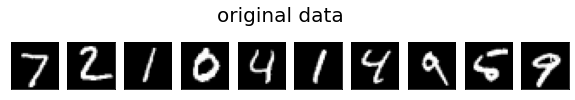

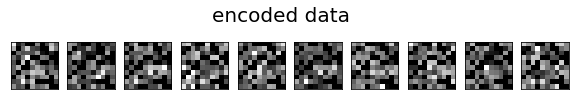

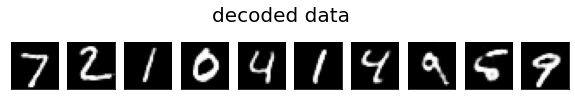

In [14]:
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")

In [15]:
cat_train_path = "/home/pratham/study/input_data/cats-dogs/training_set/training_set/cats/"
cat_test_path = "/home/pratham/study/input_data/cats-dogs/test_set/test_set/cats/"

cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_test_path+filename, target_size=(128, 128))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

In [16]:
print("cat_train", cat_train.shape)
print("cat_test", cat_test.shape)

cat_train (4000, 128, 128, 3)
cat_test (1011, 128, 128, 3)


# *Visualize the cats*

In [17]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15,5))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [1]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

NameError: name 'show_cat_data' is not defined

# *Build the cat Autoencoder*

In [49]:
input_layer = Input(shape=(128,128,3), name = "INPUT")
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name = "CODE")(x)

x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(code_layer)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(16, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
outpput_layer = Conv2D(3, (3,3), padding='same', name='OUTPUT')(x)

cat_AE = Model(input_layer, outpput_layer)

In [50]:
cat_AE.compile(optimizer='adam', loss='mse')
cat_AE.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
CODE (MaxPooling2D)          (None, 16, 16, 8)         0   

# *Train the cat Autoencoder*

In [51]:
cat_AE.fit(cat_train, cat_train,
          epochs=30,
          batch_size = 32,
          shuffle=True,
          validation_data=(cat_test, cat_test))

Epoch 1/30
125/125 [==============================] - 4s 22ms/step - loss: 4810.6139 - val_loss: 1105.5889
Epoch 2/30
125/125 [==============================] - 2s 19ms/step - loss: 1025.5304 - val_loss: 914.4623
Epoch 3/30
125/125 [==============================] - 2s 19ms/step - loss: 857.0171 - val_loss: 745.4922
Epoch 4/30
125/125 [==============================] - 2s 19ms/step - loss: 710.4027 - val_loss: 666.3860
Epoch 5/30
125/125 [==============================] - 2s 19ms/step - loss: 650.2078 - val_loss: 628.2541
Epoch 6/30
125/125 [==============================] - 2s 19ms/step - loss: 598.3758 - val_loss: 604.0549
Epoch 7/30
125/125 [==============================] - 2s 19ms/step - loss: 590.3624 - val_loss: 584.6421
Epoch 8/30
125/125 [==============================] - 2s 19ms/step - loss: 575.0245 - val_loss: 570.1923
Epoch 9/30
125/125 [==============================] - 2s 19ms/step - loss: 556.8588 - val_loss: 559.7690
Epoch 10/30
125/125 [==============================]

# *Save model*

In [52]:
#cat_AE.save('cat_AE.h5')

# *Make a model to get the encoded representation (i.e. intermediate layer output) for a given cat image.*

In [53]:
get_encoded_data = Model(inputs=cat_AE.input, outputs = cat_AE.get_layer("CODE").output)

# *Get the encoded cats*

In [54]:
encoded_cat = get_encoded_data.predict(cat_test)
encoded_cat.shape

(1011, 16, 16, 8)

In [55]:
encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
encoded_cat.shape

(1011, 2048)

# *Get the reconstructed cats*

In [56]:
reconstructed_cats = cat_AE.predict(cat_test)

In [57]:
reconstructed_cats.shape

(1011, 128, 128, 3)

# *Visialize the results on test set*

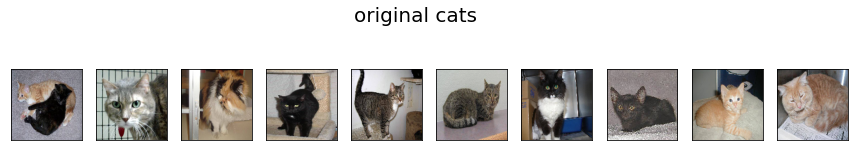

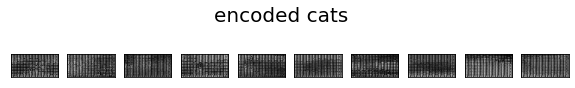

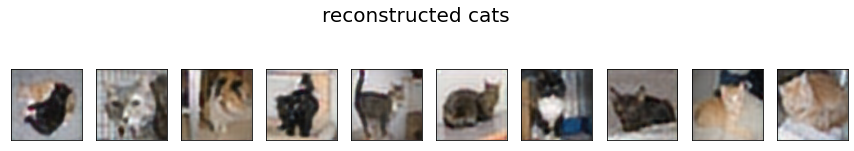

In [125]:
show_cat_data(cat_test, title="original cats")
show_data(encoded_cat, height=32, width=64, title="encoded cats")
show_cat_data(reconstructed_cats, title="reconstructed cats")

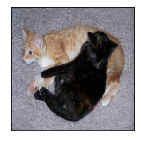

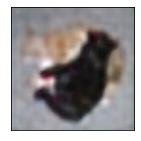

In [127]:
pred = cat_AE.predict(cat_test[0].reshape(-1, 128, 128, 3))
show_cat_data(cat_test, n =1)
show_cat_data(pred, n=1)

In [124]:
from sklearn import metrics
score1 = np.sqrt(metrics.mean_squared_error(pred.flatten(), cat_test[0].reshape(-1, 128, 128, 3).flatten()))
print(f"Score 1 Good Score (RMSE): {score1}")

Score 1 Good Score (RMSE): 14.783137321472168


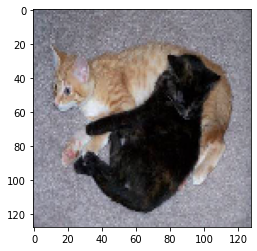

In [115]:
plt.imshow(image.array_to_img(cat_test[0]))

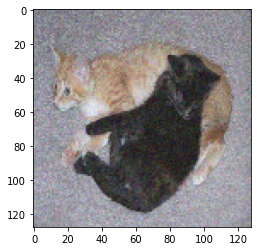

In [123]:
img = cat_test[0]
gaussian = np.random.normal(10, 10, (img.shape[0],img.shape[1], img.shape[2])) 
noisy_image = img + gaussian
plt.imshow(image.array_to_img(noisy_image))

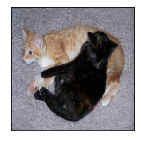

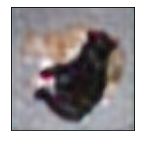

In [128]:
pred = cat_AE.predict(noisy_image.reshape(-1, 128, 128, 3))
show_cat_data(cat_test, n =1)
show_cat_data(pred, n=1)

In [129]:
from sklearn import metrics
score2 = np.sqrt(metrics.mean_squared_error(pred.flatten(), cat_test[0].reshape(-1, 128, 128, 3).flatten()))
print(f"Score 2 With 10 Noise Score (RMSE): {score2}")

Score 2 With 10 Noise Score (RMSE): 18.26371192932129


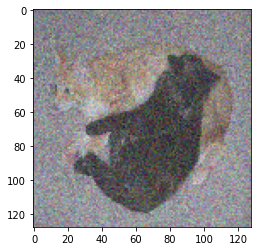

In [130]:
img = cat_test[0]
gaussian = np.random.normal(30, 30, (img.shape[0],img.shape[1], img.shape[2])) 
noisy_image = img + gaussian
plt.imshow(image.array_to_img(noisy_image))

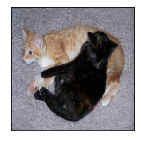

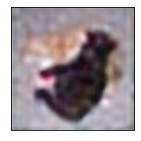

In [131]:
pred = cat_AE.predict(noisy_image.reshape(-1, 128, 128, 3))
show_cat_data(cat_test, n =1)
show_cat_data(pred, n=1)

In [132]:
from sklearn import metrics
score3 = np.sqrt(metrics.mean_squared_error(pred.flatten(), cat_test[0].reshape(-1, 128, 128, 3).flatten()))
print(f"Score 2 With 30 Noise Score (RMSE): {score3}")

Score 2 With 30 Noise Score (RMSE): 36.97348403930664
